# Homework 1: Machine numbers; Interpolation

Due April 11th

## (1) Floating point representation

[Floating Point Representation](https://en.wikipedia.org/wiki/Single-precision_floating-point_format)

Comment on why the numbers you get are expected based on the IEEE 754 representation

### IEEE 754 representation
$(-1)^S*2^{E-1023}*1.F$


In [173]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# (1a)

a) Smallest $\epsilon$ such that $1.0-\epsilon \neq 1.0$ 

In [628]:
n=0.0
eps = 2
while 1-eps != 1:
    smallest_eps = eps
    n -= 1.0
    eps = 2**float(n)
# Check with IEEE Representation
IEEE_eps = (-1)**0 *1.0* 2.**(970 - 1023) # =2**(-53)

print("The smallest number for epsilon I calulated such taht `1-epsilon` does not equal 1 is \n{0}.".format(smallest_eps))
print("I checked it with the numpy class `finfo` and got the same answer: \n{0}".format(np.finfo(float).epsneg))
print("This is consistent with IEEE 754 representation as I calculated the same answer using the equation: \n"+
     "{0}".format(IEEE_eps))

The smallest number for epsilon I calulated such taht `1-epsilon` does not equal 1 is 
1.1102230246251565e-16.
I checked it with the numpy class `finfo` and got the same answer: 
1.1102230246251565e-16
This is consistent with IEEE 754 representation as I calculated the same answer using the equation: 
1.1102230246251565e-16


# (1b)

b) Smallest $\epsilon$ such that $1.0+\epsilon \neq 1.0$ 

In [627]:
n=1.0
eps = 2
while 1+eps != 1.0:
    smallest_eps = eps
    n -= 1.0
    eps = 2**float(n)
IEEE_eps = (-1)**0 *1.0* 2.**(971 - 1023) # =2**(-52)
smallest_eps
print("The smallest number for epsilon I calulated such that `1+epsilon` does not equal 1 is: \n{0}.".format(smallest_eps))
print("I checked it with the numpy class `finfo` and got the same answer: \n{0}".format(np.finfo(float).eps))
print("This is consistent with IEEE 754 representation as I calculated the same answer using the equation: \n"+
     "{0}".format(IEEE_eps))

The smallest number for epsilon I calulated such that `1+epsilon` does not equal 1 is: 
2.220446049250313e-16.
I checked it with the numpy class `finfo` and got the same answer: 
2.220446049250313e-16
This is consistent with IEEE 754 representation as I calculated the same answer using the equation: 
2.220446049250313e-16


# (1c)

c) The maximum representable positive number


In [626]:
n = 2.0 #1e1
num = 1.0
while num < float("inf"):
    max_num = num
    n += 1
    num = np.array([2])**(n)
    #num *= 2.0 #1.0001
max_num[0]
mantissa = (2-2**(-52))
max_num[0]*mantissa
IEEE_max = (-1)**0 * mantissa * 2**(2046 - 1023) # 
print("The maximum representable positive number for my machine is: \n{0}".format(max_num[0]*mantissa))
print("I checked it with the numpy class `finfo` and got the same answer: \n{0}".format(np.finfo(float).max))
print("This is consistent with IEEE 754 representation as I calculated the same answer using the equation: \n"+
     "{0}".format(IEEE_max))


The maximum representable positive number for my machine is: 
1.7976931348623157e+308
I checked it with the numpy class `finfo` and got the same answer: 
1.7976931348623157e+308
This is consistent with IEEE 754 representation as I calculated the same answer using the equation: 
1.7976931348623157e+308


# (1d) 

d) The minimum representable positive number

In [684]:
n=2.0
while num > 0.0:
    min_num = num
    n -= 1
    num = 2**(n)
    
min_positive = (-1)**0 *1.* 2.**(1-1023)
print("The minimum representable positive number for my machine is: \n{0}".format(min_num))
print("Although the smallest positive usable number is: \n{0}".format(np.finfo(float).tiny))
print("The difference between the two is that the first one has basically no precision while the second does.")
print("We can see from IEEE 754 that it is consistent with my results: \n{0}".format(min_positive))

The minimum representable positive number for my machine is: 
5e-324
Although the smallest positive usable number is: 
2.2250738585072014e-308
The difference between the two is that the first one has basically no precision while the second does.
We can see from IEEE 754 that it is consistent with my results: 
2.2250738585072014e-308


### Summary of problem 1

<center>IEEE 754 formula:<center>

$$(-1)^S * 2^{E-1023}*1.F$$

My answers are consistent with IEEE 754 representation as they follow the formula. It is important to remember the mantissa in each one. Especially when finding the maximum because the fraction can be fairly significant. It increases the leargest representable value by an orer of magnitude.

# (2) Roundoff Error

Numerically evaluate the expression, 

## $$ f(x) = \frac{1-cos(x)}{x^2}$$

in double precision for values of $x$ around $10^{-7}$ and smaller. Explain the difference between the numerical results and the analytic limit as $x\rightarrow0$

### Analytic Solution

#### $ lim_{x\rightarrow 0}$ $f(x) = lim_{x\rightarrow 0} \frac{1-cos(x)}{x^2} $

Use L'Hôpital's Rule:

$ \frac{1-cos(x)}{x^2} \rightarrow\frac{sin(x)}{2x}\rightarrow\frac{cos(x)}{2}$ 

Evaluate function at x=0 so:

$ lim_{x\rightarrow 0} \frac{1-cos(x)}{x^2} = \frac{cos(0)}{2} = \frac{1}{2}$ 

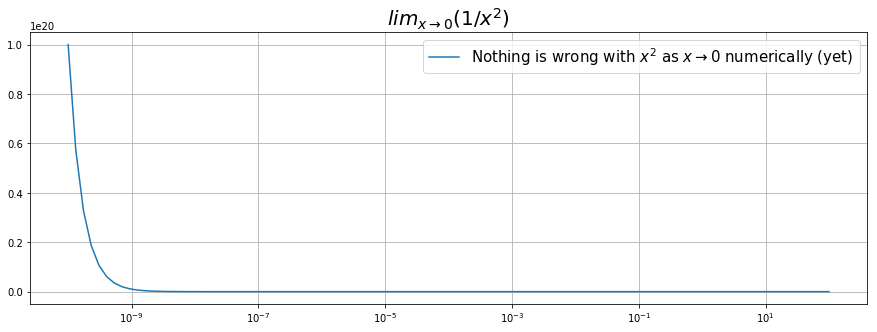

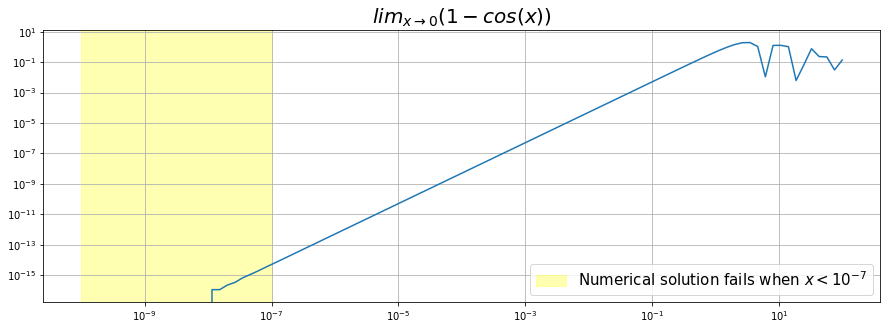

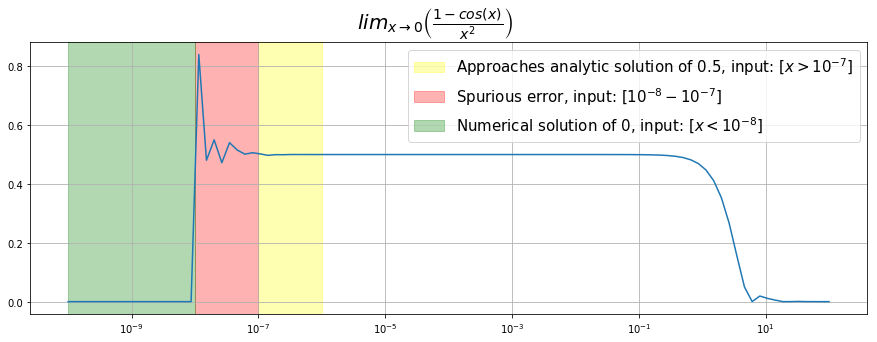

In [685]:
def myfunc(x):
    return (1-np.cos(x))/x**2

x = np.logspace(-10,2,100)

# 1
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
ax.set_title(r'$lim_{x\rightarrow0} (1/x^2)$', fontsize=20)
ax.semilogx(x,1/x**2, label=r"Nothing is wrong with $x^2$ as $x\rightarrow0$ numerically (yet)")
ax.legend(fontsize = 15)
plt.show()

# 2
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
ax.set_title(r'$lim_{x\rightarrow0} \left(1-cos(x)\right)$', fontsize=20)
ax.loglog(x,1-np.cos(x))
ax.axvspan(1e-10, 1e-7, alpha=0.3, color='yellow',label = r'Numerical solution fails when $x<10^{-7}$')
ax.legend(loc='best', fontsize = 15)
plt.show()

# 3
fig,ax = plt.subplots(1)
fig.set_size_inches(15,5)
ax.grid()
plt.suptitle(r'$lim_{x\rightarrow0} \left(\frac{1-cos(x)}{x^2}\right)$', fontsize=20)
#ax.set_title(r'$lim_{x\rightarrow0} \left(\frac{1-cos(x)}{x^2}\right)$', fontsize=15)
ax.semilogx(x,myfunc(x))
ax.axvspan(1e-7, 1e-6, alpha=0.3, color='yellow',label = r'Approaches analytic solution of 0.5, input: $[x>10^{-7}]$')
ax.axvspan(1e-8, 1e-7, alpha=0.3, color='red',label = r'Spurious error, input: $[10^{-8}-10^{-7}]$')
ax.axvspan(1e-10, 1e-8, alpha=0.3, color='green',label = r'Numerical solution of 0, input: $[x<10^{-8}]$')
ax.legend(loc='best', fontsize = 15)
plt.show()

Using L'Hôpital's Rule, the analytic solution is $1/2$. Although the numerical solution is $0$ as $x\rightarrow0$. The reason the numerical solution has problems at values smaller than $10^{-7}$ is the $cos(x)$. Due to the limited precision of floating point numbers, it will round very small numbers. This will cause $1-cos(x)$ to be equal to $0$ since the cosine of a very small number approaches 1 and when it loses precision the computer will represent it as exactly $1.0$. This is is something astronomers should be vigilant with when dealing with numbers near the limit of computational precision.

# (3) Interpolation

(a) Write a program to read in a two column table from a file and perform
linear interpolation at an arbitrary point [DONE]

(b) Use the program on `hw1.dat`and provide a linear estimate of `y` at `x = 0.75` [DONE]

(c) Write a program using **Neville’s algorithm** to fit a 4th order polynomial
to the above data and provide an estimate of `y` at `x = 0.75` [DONE]

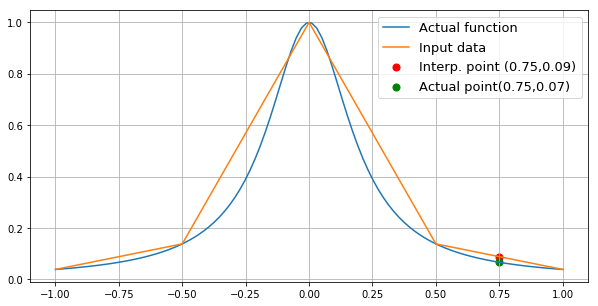

In [687]:
def read_data(file='hw1.dat'): # reads in data file
    data = np.loadtxt(file).T
    return data[0],data[1]

def linear_interp(x,y,arbitrary_point): # performs linear interpolation at a point
    return np.interp(arbitrary_point, x, y)

def actual_function(x): # the exact function we are modeling
    return 1/(1+25*x**2)

x,y = read_data() # x,y are the actual data points
x_cont = np.sort(np.append(np.linspace(-1,1,100),0.75)) # x_cont,y_cont represent more continuous/smooth data 
y_cont = actual_function(x_cont)
x_0 = 3/4 # the arbitrary point
y_0 = linear_interp(x,y,x_0) # the linearly interpolated point

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(x_cont,y_cont,label='Actual function')
plt.plot(x,y, label='Input data')
plt.scatter([x_0],[y_0],s=50, color='red',
            label='Interp. point ({0:.2f},{1:.2f})'.format(x_0,y_0))
plt.scatter([x_0],actual_function(x_0),s=50, color='green',
            label='Actual point({0:.2f},{1:.2f})'.format(x_0,actual_function(x_0)))
plt.legend(loc='best', fontsize=13)
plt.show()

### (c) NEVILLE'S ALGORITHM

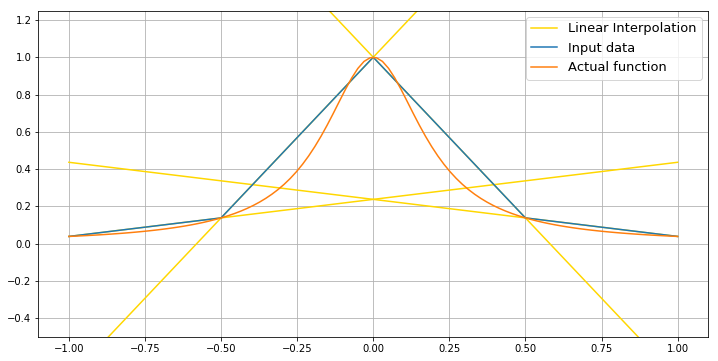

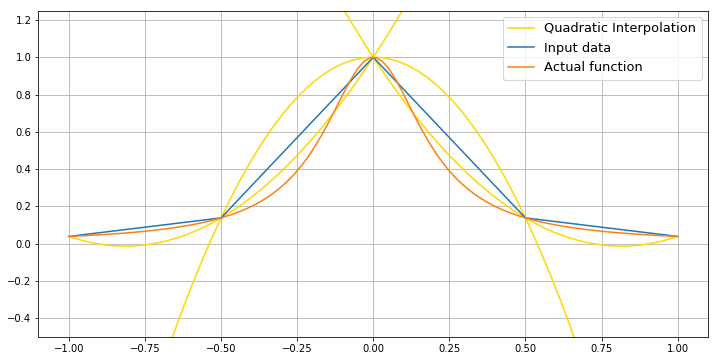

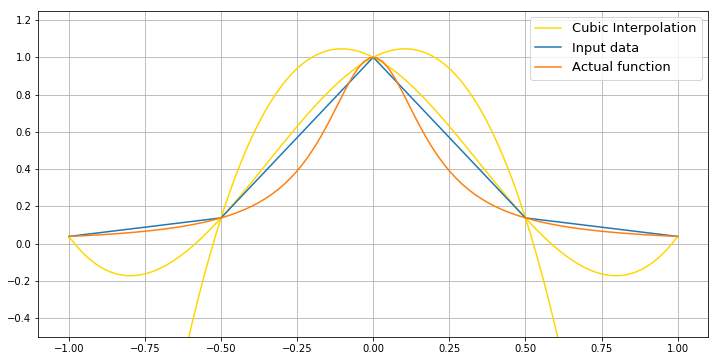

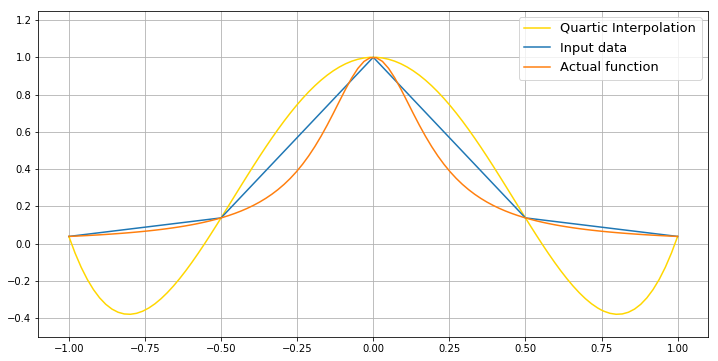

In [698]:
def P_ij(x,x_continuous,i,j): # linear
    return ((x_continuous-x[j])*P_i[i] + (x[i]-x_continuous)*P_i[j])/(x[i]-x[j])
def P_ijk(x,x_continuous,i,j,k): # quadratic
    return ((x_continuous-x[k])*P_ij(x,x_cont,i,j) + (x[i]-x_continuous)*P_ij(x,x_cont,j,k))/(x[i]-x[k])
def P_ijkl(x,x_continuous,i,j,k,l): # cubic
    return ((x_continuous-x[l])*P_ijk(x,x_cont,i,j,k) + (x[i]-x_continuous)*P_ijk(x,x_cont,j,k,l))/(x[i]-x[l])
def P_ijklm(x,x_continuous,i,j,k,l,m): # quartic
    return ((x_continuous-x[m])*P_ijkl(x,x_cont,i,j,k,l) + (x[i]-x_continuous)*P_ijkl(x,x_cont,j,k,l,m))/(x[i]-x[m])
P_i = np.copy(y)

plt.figure(figsize=(12,6))
plt.grid()
plt.ylim(-0.5,1.25)
plt.plot(x_cont,P_ij(x,x_cont,0,1), color = 'gold')
plt.plot(x_cont,P_ij(x,x_cont,1,2), color = 'gold')
plt.plot(x_cont,P_ij(x,x_cont,2,3), color = 'gold')
plt.plot(x_cont,P_ij(x,x_cont,3,4), color = 'gold', label ='Linear Interpolation')
plt.plot(x,y, label='Input data')
plt.plot(x_cont,y_cont,label='Actual function')
plt.legend(loc='best', fontsize=13)
plt.show()

plt.figure(figsize=(12,6))
plt.grid()
plt.ylim(-0.5,1.25)
plt.plot(x_cont,P_ijk(x,x_cont,0,1,2), color = 'gold')
plt.plot(x_cont,P_ijk(x,x_cont,1,2,3), color = 'gold')
plt.plot(x_cont,P_ijk(x,x_cont,2,3,4), color = 'gold', label = 'Quadratic Interpolation')
plt.plot(x,y, label='Input data')
plt.plot(x_cont,y_cont,label='Actual function')
plt.legend(loc='best', fontsize=13)
plt.show()

plt.figure(figsize=(12,6))
plt.grid()
plt.ylim(-0.5,1.25)
plt.plot(x_cont,P_ijkl(x,x_cont,0,1,2,3), color = 'gold')
plt.plot(x_cont,P_ijkl(x,x_cont,1,2,3,4), color = 'gold', label = 'Cubic Interpolation')
plt.plot(x,y, label='Input data')
plt.plot(x_cont,y_cont,label='Actual function')
plt.legend(loc='best', fontsize=13)
plt.show()

plt.figure(figsize=(12,6))
plt.grid()
plt.ylim(-0.5,1.25)
plt.plot(x_cont,P_ijklm(x,x_cont,0,1,2,3,4), color = 'gold', label = 'Quartic Interpolation')
plt.plot(x,y, label='Input data')
plt.plot(x_cont,y_cont,label='Actual function')
plt.legend(loc='best', fontsize=13)
plt.show()

In [752]:
point_on_quadratic = P_ijklm(x,x_cont,0,1,2,3,4)[x_cont==0.75][0]
print("The point on the quartic interpolation at x=0.75 is: \n{0}".format(point_on_quadratic))
print("The point on the linear interpolation at x=0.75 is: \n{0}".format(y_0))
print("The point on the actual function at x=0.75 is: \n{0}".format(actual_function(x_0)))
proportion = np.abs((actual_function(x_0)-point_on_quadratic)/(actual_function(x_0)-y_0))
print("The point on the linear interpolation at x=0.75 is "+
      "{0:.3f} times closer to the actual value \nthan the quartic interpolation".format(proportion))

The point on the quartic interpolation at x=0.75 is: 
-0.3568260996875
The point on the linear interpolation at x=0.75 is: 
0.08819628500000001
The point on the actual function at x=0.75 is: 
0.06639004149377593
The point on the linear interpolation at x=0.75 is 19.408 times closer to the actual value 
than the quartic interpolation


In this problem I noticed that the linear interpolation is much better than the quartic interpolation with Neville's algorithm. (By a factor of about 20). This reason for this is because the actual function is not a polynomial and does not act like one very much. If it were more wiggly or we had more data perhaps it would be a better fit. The actual function drops as $1/(x^2)$ basically which is undescribable exactly with a polynomial. Linear was the best fit because it had the smallest amount of curvature. The curvature of the linear and actual function matched eachother best (even though the linear function lacked curvature at all!)